In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy import optimize as opt

import pandas as pd
import xarray as xr

plt.rcParams['figure.figsize'] = [20/2.54, 15/2.54]


In [2]:
t = np.arange(600) + 1850


In [3]:
def gauss(t,a,b,c):
    y = a*np.exp(-((t-b)**2.)/(2*c**2))
    return(y)

def gaussderiv(t,a,b,c):
    y = (a*(b-t)*np.exp(-((b-t)**2.)/(2*c**2.)))/(c**2.)
    return(y)

def gaussderiv_1000pg(t,b,c):
    y = (1000.*(b-t)*np.exp(-((b-t)**2.)/(2*c**2.)))/(c**2.)
    return(y)

def gaussderiv_750pg(t,b,c):
    y = (750.*(b-t)*np.exp(-((b-t)**2.)/(2*c**2.)))/(c**2.)
    return(y)

def sigmoidal_curve(t, midpoint, width, minval, maxval):
    s = minval + (maxval-minval)/(1.+np.exp((midpoint - t)/width))
    return s

In [4]:
###  ingest data on fossil fuel co2 emissions and put into units of Pg C / yr
my_data = genfromtxt('global_1751_2017.csv', delimiter=',', skip_header=5)
years_cdiac = my_data[:,0]
emissions = my_data[:,1] * 1e-3

In [5]:
### calculate best-fit curves for the emission data, assuming
### that the form of the curve is the derivative of a gaussian
### first allow three parameters (peak cumulative emissions, 
### time fo emissions, width of curve)
### then retry assuming an integrated curve of 1000 Pg C or 750 Pg C

a = opt.curve_fit(gaussderiv,years_cdiac,emissions, p0=(10,2050,50))
b = opt.curve_fit(gaussderiv_1000pg,years_cdiac,emissions, p0=(2050,50))
c = opt.curve_fit(gaussderiv_750pg,years_cdiac,emissions, p0=(2050,50))


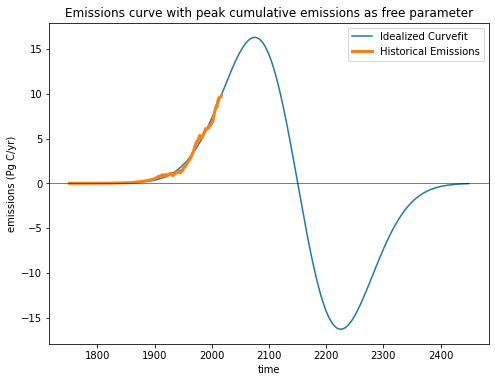

In [6]:
y = gaussderiv(t,a[0][0],a[0][1],a[0][2])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative emissions as free parameter')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')


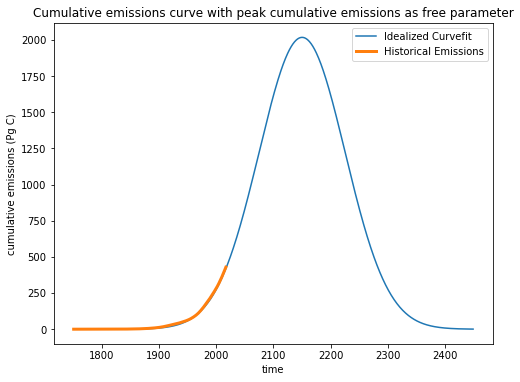

In [7]:
y = gauss(t,a[0][0],a[0][1],a[0][2])
plt.plot(t,y)
plt.plot(years_cdiac,emissions.cumsum(), linewidth=3.)
plt.xlabel('time')
plt.ylabel('cumulative emissions (Pg C)')
plt.title ('Cumulative emissions curve with peak cumulative emissions as free parameter')
plt.legend(('Idealized Curvefit','Historical Emissions'))


(1900.0, 2100.0)

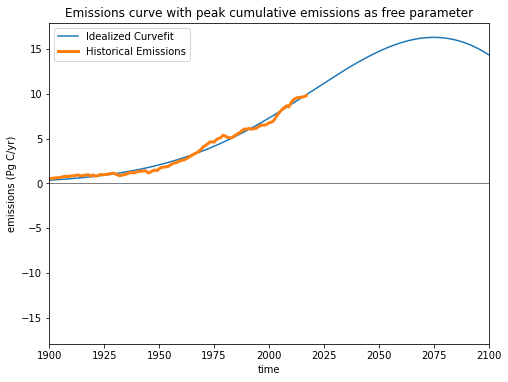

In [8]:
y = gaussderiv(t,a[0][0],a[0][1],a[0][2])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative emissions as free parameter')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')
plt.xlim(1900,2100)


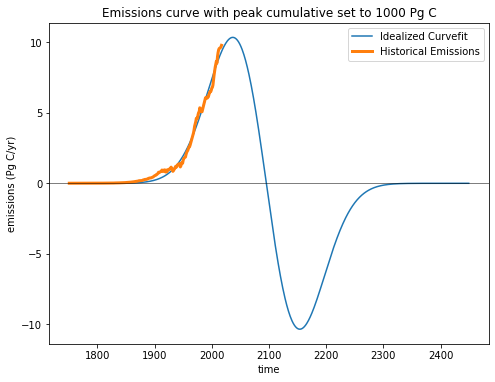

In [9]:
y = gaussderiv(t,1000,b[0][0],b[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative set to 1000 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')


(1900.0, 2100.0)

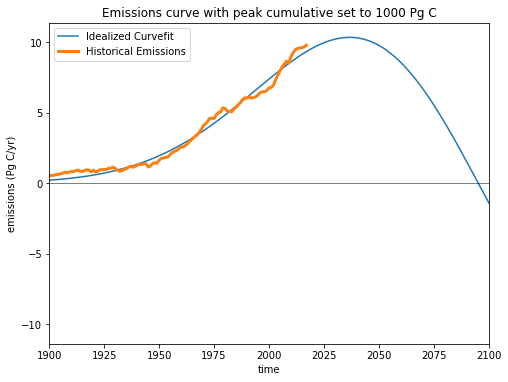

In [10]:
y = gaussderiv(t,1000,b[0][0],b[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative set to 1000 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')
plt.xlim(1900,2100)


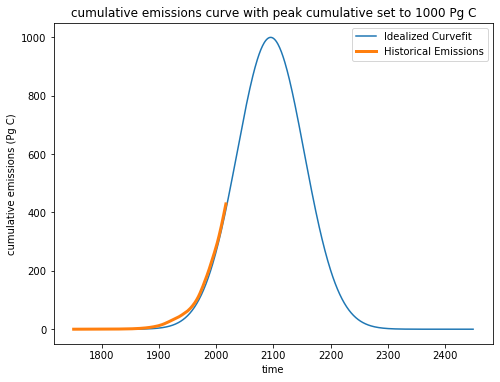

In [11]:
y = gauss(t,1000,b[0][0],b[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions.cumsum(), linewidth=3.)
plt.xlabel('time')
plt.ylabel('cumulative emissions (Pg C)')
plt.title ('cumulative emissions curve with peak cumulative set to 1000 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))


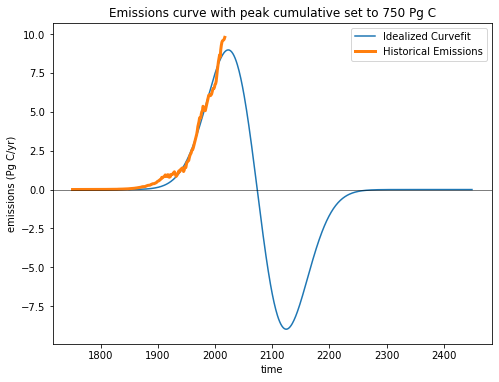

In [12]:
y = gaussderiv(t,750,c[0][0],c[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative set to 750 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')


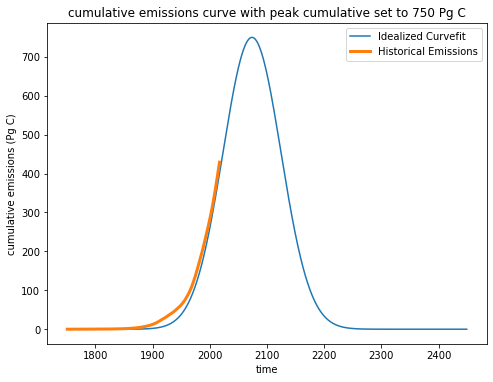

In [13]:
y = gauss(t,750,c[0][0],c[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions.cumsum(), linewidth=3.)
plt.xlabel('time')
plt.ylabel('cumulative emissions (Pg C)')
plt.title ('cumulative emissions curve with peak cumulative set to 750 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))


(1900.0, 2100.0)

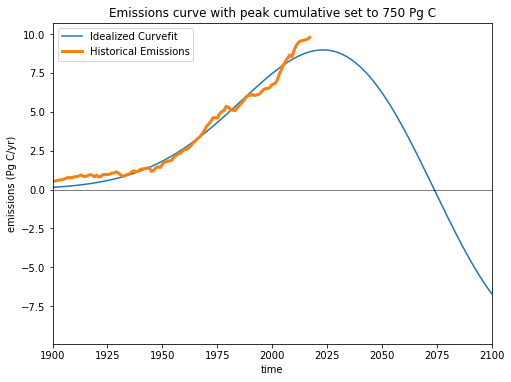

In [14]:
y = gaussderiv(t,750,c[0][0],c[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative set to 750 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')
plt.xlim(1900,2100)


In [15]:
a

(array([2018.66395918, 2150.1800967 ,   75.14013574]),
 array([[6.38610181e+04, 2.50159280e+03, 6.69830805e+02],
        [2.50159280e+03, 9.86428215e+01, 2.66358920e+01],
        [6.69830805e+02, 2.66358920e+01, 7.28675720e+00]]))

In [16]:
b

(array([2095.25489269,   58.57040735]),
 array([[0.2474225 , 0.1664713 ],
        [0.1664713 , 0.15230273]]))

In [17]:
c

(array([2073.73141688,   50.63562655]),
 array([[0.23201517, 0.13597773],
        [0.13597773, 0.14203289]]))

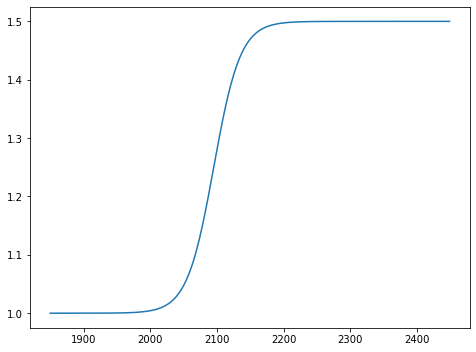

In [18]:
d = sigmoidal_curve(t, b[0][0], 20., 1., 1.5)
plt.plot(t,d)

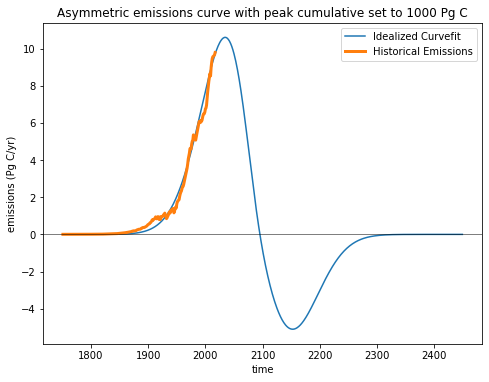

In [19]:
y = gaussderiv(t,1046,b[0][0],b[0][1]) / sigmoidal_curve(t, b[0][0], 15., 1., 2.145)
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Asymmetric emissions curve with peak cumulative set to 1000 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')

500.29385647961874
1000.851743681515


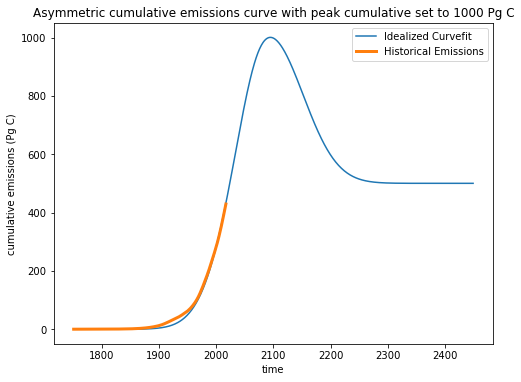

In [20]:
plt.plot(t,y.cumsum())
plt.plot(years_cdiac,emissions.cumsum(), linewidth=3.)
plt.xlabel('time')
plt.ylabel('cumulative emissions (Pg C)')
plt.title ('Asymmetric cumulative emissions curve with peak cumulative set to 1000 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))

print(y.cumsum()[-1])
print(y.cumsum().max())

In [21]:
### read in co2 emission sdata from IAM extensions
iam_emissions_filename = 'rcmip-emissions-annual-means-v5-1-0.csv'
iam_emissions_file = pd.read_csv(iam_emissions_filename)

ssp534os_co2emiss = iam_emissions_file[(iam_emissions_file.Scenario == 'ssp534-over') * (iam_emissions_file.Variable == 'Emissions|CO2|MAGICC Fossil and Industrial') * (iam_emissions_file.Region == 'World')]
ssp585_co2emiss = iam_emissions_file[(iam_emissions_file.Scenario == 'ssp585') * (iam_emissions_file.Variable == 'Emissions|CO2|MAGICC Fossil and Industrial') * (iam_emissions_file.Region == 'World')]
ssp126_co2emiss = iam_emissions_file[(iam_emissions_file.Scenario == 'ssp126') * (iam_emissions_file.Variable == 'Emissions|CO2|MAGICC Fossil and Industrial') * (iam_emissions_file.Region == 'World')]
ssp119_co2emiss = iam_emissions_file[(iam_emissions_file.Scenario == 'ssp119') * (iam_emissions_file.Variable == 'Emissions|CO2|MAGICC Fossil and Industrial') * (iam_emissions_file.Region == 'World')]


/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [22]:
nyears_total = 450
iam_emissions = xr.DataArray(np.ma.masked_all((3,nyears_total)), dims=['scenarios','time'], coords=[np.arange(3), np.arange(nyears_total)+1850.])

iam_emissions[1,:] = ssp534os_co2emiss.iloc[0,107:557]*1e-3 * 12/44
iam_emissions[0,:] = ssp119_co2emiss.iloc[0,107:557]*1e-3 * 12/44
iam_emissions[2,:] = ssp126_co2emiss.iloc[0,107:557]*1e-3 * 12/44

iam_emissions_nomissing = iam_emissions.dropna(dim='time')


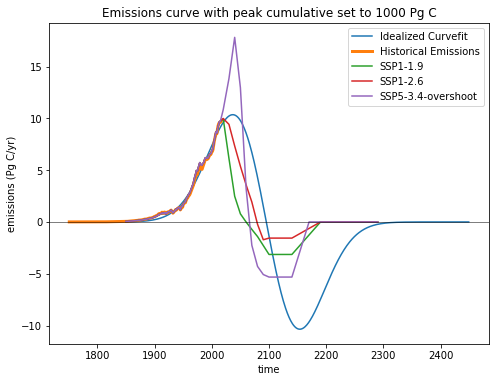

In [23]:
y = gaussderiv(t,1000,b[0][0],b[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[0,:].data)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[2,:].data)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[1,:].data)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative set to 1000 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions', 'SSP1-1.9', 'SSP1-2.6','SSP5-3.4-overshoot'))
plt.axhline(y=0, linewidth=0.5, color='black')



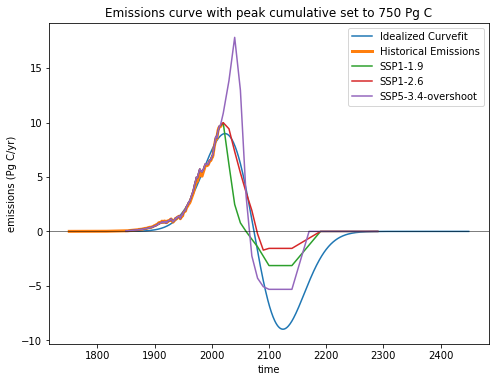

In [24]:
y = gaussderiv(t,750,c[0][0],c[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[0,:].data)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[2,:].data)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[1,:].data)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative set to 750 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions','SSP1-1.9', 'SSP1-2.6','SSP5-3.4-overshoot'))
plt.axhline(y=0, linewidth=0.5, color='black')



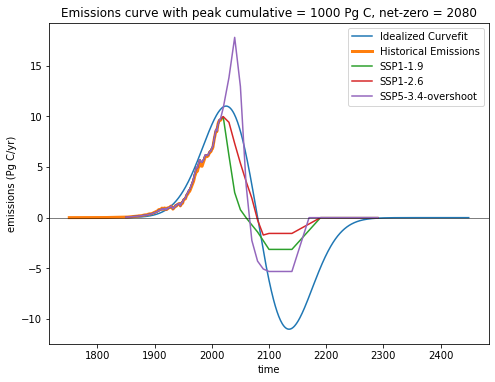

In [25]:
y = gaussderiv(t,1000,2080,55)
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[0,:].data)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[2,:].data)
plt.plot(iam_emissions_nomissing.time, iam_emissions_nomissing[1,:].data)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative = 1000 Pg C, net-zero = 2080')
plt.legend(('Idealized Curvefit','Historical Emissions','SSP1-1.9', 'SSP1-2.6','SSP5-3.4-overshoot'))
plt.axhline(y=0, linewidth=0.5, color='black')




In [26]:
b[0][0],b[0][1]

(2095.254892688129, 58.570407354811145)